In [1]:
import environment
import os
import pandas as pd
import numpy as np
from scipy import stats

In [20]:
a = environment.ts('01302019','NASDAQ','CSCO')

In [21]:
a.book.head()

,time,1_bid_price,1_bid_vol,1_ask_price,1_ask_vol,2_bid_price,2_bid_vol,2_ask_price,2_ask_vol,3_bid_price,...,3_ask_price,3_ask_vol,4_bid_price,4_bid_vol,4_ask_price,4_ask_vol,5_bid_price,5_bid_vol,5_ask_price,5_ask_vol
0,14408663402213,45.76,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14408805518619,45.76,100.0,46.00,100.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14414487207475,45.76,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14414487510528,45.76,100.0,45.99,100.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14474227691732,45.76,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data = pd.DataFrame(index = a.book.index)
data['time'] = a.time

In [23]:
data['orderImbalance'] = (a.book['1_bid_vol']-a.book['1_ask_vol'])/(a.book['1_bid_vol']+a.book['1_ask_vol'])

In [24]:
data['mid'] = (a.book['1_bid_price']+a.book['1_ask_price'])/2
data['direction'] = np.sign(data['mid'].pct_change())

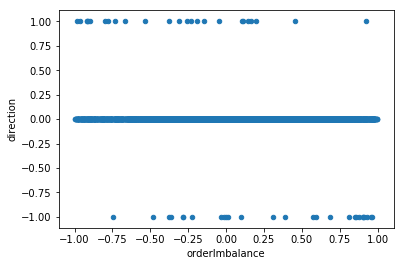

In [31]:
data.sample(n=5000).plot.scatter(y='direction',x='orderImbalance')

In [70]:
mask = data[(data['orderImbalance'].abs()>0.6) & (data['direction']!=0)]

hitRatio = (np.sign(mask['orderImbalance']) == mask['direction']).mean()
print(hitRatio)

0.12228116710875332


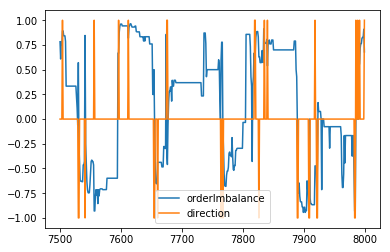

In [71]:
data[["orderImbalance", "direction"]].iloc[7500:8000].plot()

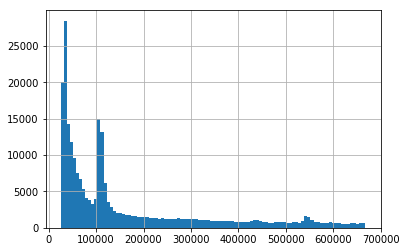

In [19]:
pd.Series(stats.trimboth(data.time.diff(),0.35)).hist(bins=100)